In [1]:
###############################################################################
# Boston Dataset: lineare Regression
# Sidney Göhler 544131
#### IKT (M)
# Special Engineering SoSe20
# Prof. Dr. Andreas Zeiser
###############################################################################
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.gridspec as gridspec
# import seaborn as sns #pip install searborn
import logistische_regression as lr

from sklearn.datasets import load_digits
from scipy.stats.kde import gaussian_kde

In [2]:
####################
# load datasets
####################
dataset = load_digits()
#print(dataset.DESCR, '\n', '\n')
X = dataset.data
y = dataset.target

targets = dataset.target_names
images = dataset.images



In [3]:
mean, std = lr.StandardScaler_fit(X)

X = lr.StandardScaler_transform(X, mean, std+10)

In [4]:
print(np.max(X),np.min(X))

1.3473056603822613 -0.8571148139579597


In [ ]:
for ind in [0,20,500,508,1700,1787]:
    print(f'digit = {y[ind]} at index = {ind}')
    plt.matshow(images[ind], cmap = cm.cividis)
    plt.colorbar()
    plt.show()
    print(f'{images[ind]}\n\n\n')

In [5]:
####################
# split dataset (80:20)
####################


X_train, X_test, y_train, y_test = lr.train_test_split(X, y, 0.8, 0)

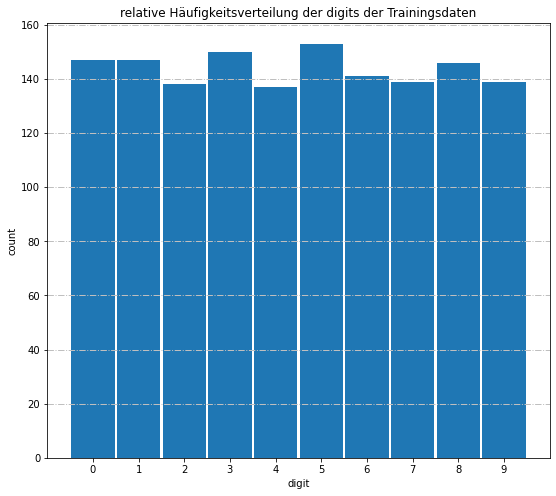

In [6]:
####################
# explore trainingset
####################

# Häufigkeitsverteilung y (target)
fig = plt.figure(figsize=(9, 8))

labels, counts = np.unique(y_train, return_counts=True)

plt.bar(labels, counts, align='center', width=0.95)
plt.gca().set_xticks(labels)
plt.xlabel('digit')
plt.xlim(-1,10)
plt.ylabel('count')
plt.title('relative Häufigkeitsverteilung der digits der Trainingsdaten')
plt.grid(color='0.75', linestyle='-.', linewidth=1, axis='y')
plt.show()

In [ ]:
print(labels,counts)

In [ ]:
mean_train, std_train = [], []
coeffs = []



labels = np.arange(-1,1,0.1)
xmax = 1
xmin = -1

for ind, col in enumerate(X_train.T):

    # print(df[col].describe())
    mean, std = lr.StandardScaler_fit(col)
    mean_train.append(mean)
    std_train.append(std)
    print(f'feature {ind} ({ind}):')
    fig1 = plt.figure(figsize=(16, 6))
    gs = gridspec.GridSpec(1, 2)
    ax = plt.subplot(gs[0])
    ax.set_xlabel('black value')
    ax.set_ylabel("count")
    ax.set_title(f"relative Häufigkeitsverteilung feature {ind} je Helligkeitswert")
    
    label, counts = np.unique(col, return_counts=True)

    ax.bar(label, counts, align='center', width=0.08)
    ax.set_xticks(labels)
    ax.set_xlim(xmin,xmax)
    ##
    ##
    
    # Verteilungsdichte bestimmen
    # random offset um die covarianz numerisch betimmen zu können
    rand = 0.0001*np.random.rand(np.size(col,0))-0.0001
    # KDE
    k = gaussian_kde(np.vstack([col+rand, y_train]))
    xi, yi = np.mgrid[xmin-1:xmax+1:col.size**0.5*1j, y_train.min()-1:y_train.max()+1:y_train.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    ax2 = plt.subplot(gs[1])
    ax2.set_xlabel('black value')
    ax2.set_ylabel("digit")
    ax2.set_xticks(labels)
    ax2.set_yticks(targets)
    ax2.set_ylim(-1,10)
    ax2.set_xlim(xmin,xmax)
    #ax2.matshow([col,y_train])
    
    #plot density
    #ax2.scatter(col, y_train, alpha=0.1)#, c=col, cmap=cm.cividis)
    #im = ax2.pcolormesh(xedges, yedges, Z.T)
    im = ax2.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap = cm.cividis, alpha=1)
    plt.colorbar(im)
    
    ##
    coeff = np.mean(np.corrcoef(col, y_train.T))
    coeffs.append(coeff)
    ax2.set_title(f"Dichteverteilung der Helligkeitswerte feature {ind} je digit")
    plt.show()

    #Feature beschreiben
    print(f'rows = {np.size(col)}\nall numeric = {not np.isnan(col).any()} ({col.dtype})\nmean = {mean}\nstd = {std}\ncorrcoef = {coeff}', '\n', '\n')


In [21]:
#X_train_9 =X_train[y_train==9]
y_train_t = []
y_test_t = []


for tar in targets:
    y_train_t.append(np.array([1 if y == tar else 0 for y in y_train]))
    y_test_t.append(np.array([1 if y == tar else 0 for y in y_test]))
    print(f'digit {tar}: {len(y_train_t[tar][y_train_t[tar]==1])} train pos label || {len(y_test_t[tar][y_test_t[tar]==1])} test pos label')
    #[147 147 138 150 137 153 141 139 146 139]

digit 0: 147 train pos label || 31 test pos label
digit 1: 147 train pos label || 35 test pos label
digit 2: 138 train pos label || 39 test pos label
digit 3: 150 train pos label || 33 test pos label
digit 4: 137 train pos label || 44 test pos label
digit 5: 153 train pos label || 29 test pos label
digit 6: 141 train pos label || 40 test pos label
digit 7: 139 train pos label || 40 test pos label
digit 8: 146 train pos label || 28 test pos label
digit 9: 139 train pos label || 41 test pos label


In [ ]:
thetas = []
Js = []

for tar in targets:
    print(tar)
    theta, J = lr.LogisticRegression_fit(X_train, y_train_t[tar], 0.3, 3e-4)
    print(theta,J)
    thetas.append(theta)
    Js.append(J)

0
[-1.16274164e+01  0.00000000e+00 -3.23727171e-01 -5.79678185e-02
  1.03306431e+00 -4.05367361e-01 -3.21995095e+00 -1.89351060e+00
 -2.34006596e-01  5.34510995e-04 -8.85712235e-01  4.38510015e-01
  1.69706213e+00  2.31882847e+00  3.02329514e+00 -1.41123351e-02
 -3.20799603e-01 -1.83025953e-02  8.25734190e-01  1.50176525e+00
  2.51533707e-02 -3.35380785e+00  3.50678441e+00  3.00800886e-01
 -1.53069123e-01 -8.83571868e-03  9.21172745e-01  2.73150019e-01
 -2.05413557e+00 -6.34768113e+00  1.08643364e-01  5.68188417e-01
 -1.96199723e-02  0.00000000e+00  1.31352335e+00  1.90194380e+00
 -1.44460634e+00 -5.07784554e+00 -4.79469889e-01  3.10097035e-01
  0.00000000e+00 -5.58630198e-02 -1.41084539e-01  3.36410257e+00
 -4.44564427e+00 -3.13744124e+00 -2.36067451e-02  6.46394104e-01
  1.52270275e-02 -1.58182953e-01 -1.14635332e+00  1.08518228e+00
 -3.44159082e-01  9.36875712e-01 -6.97716652e-01 -2.16807155e+00
 -7.23848656e-01 -2.23222464e-04 -4.48784914e-01 -1.74001747e+00
  1.55509090e+00 -2.222

In [26]:
for tar in [0]:
    print(tar)
    tar = 0
    y_pred = lr.LogisticRegression_predict(X_test, thetas[tar])
    print(y_pred)
    print(y_test_t[tar])
    acc = lr.accuracy_score(y_pred,y_test_t[tar])
    precision = lr.precision_score(y_pred,y_test_t[tar])
    recall = lr.recall_score(y_pred,y_test_t[tar])
    print('Accuracy: ',acc,'\nPrecision: ',precision,'\nRecall: ', recall)


0
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0

In [22]:
print(len(thetas))

0
